# Udacity's Data Analyst Nanodegree
## Project 2 - The Data Analysis Process

In this project we will analyze the No-Show Database.

***
### Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
### Loading database and performing initial checks:

In [48]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:

print(f"Are there duplicated patient ids? {'Yes' if any(df.PatientId.duplicated()) else 'No'}")
print(f"Are there duplicated patient ids? {'Yes' if any(df.AppointmentID.duplicated()) else 'No'}")


Are there duplicated patient ids? Yes
Are there duplicated patient ids? No


In [55]:
# There are no duplicated Appointment ID rows, thus we can drop them, assuming 
# they won't contribute to the analysis.
df.drop(['AppointmentID'],axis = 1, inplace = True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


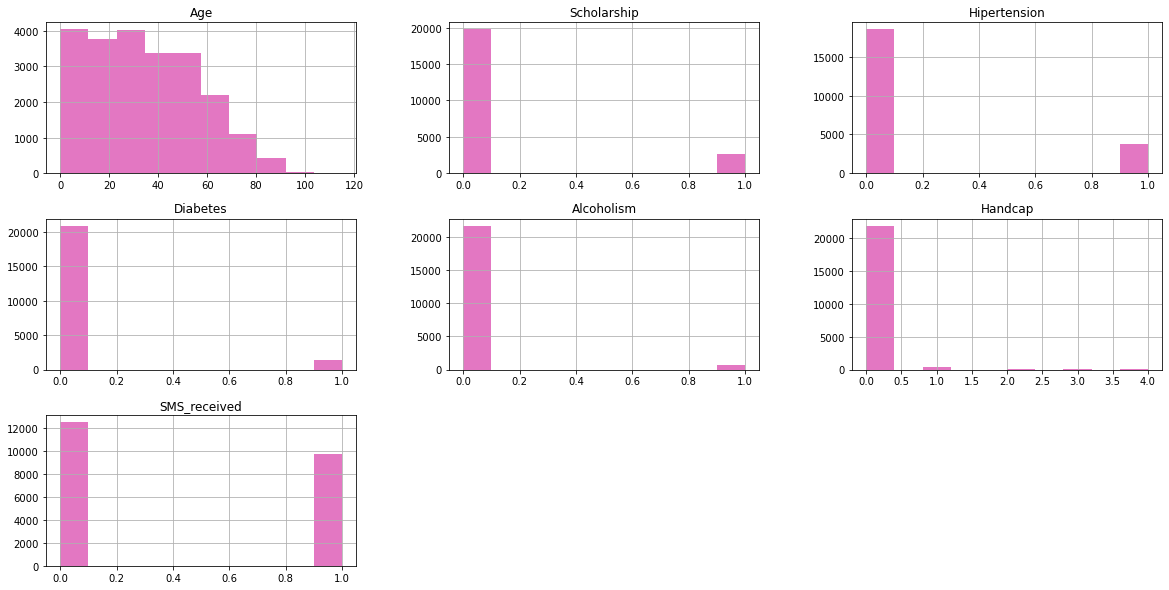

In [43]:
no_show = df['No-show'] == 'Yes' # patient did not show
yes_show = df['No-show'] == 'No' # patient did not show

df[no_show].hist(figsize=(20,10), color='tab:pink');
plt.show();

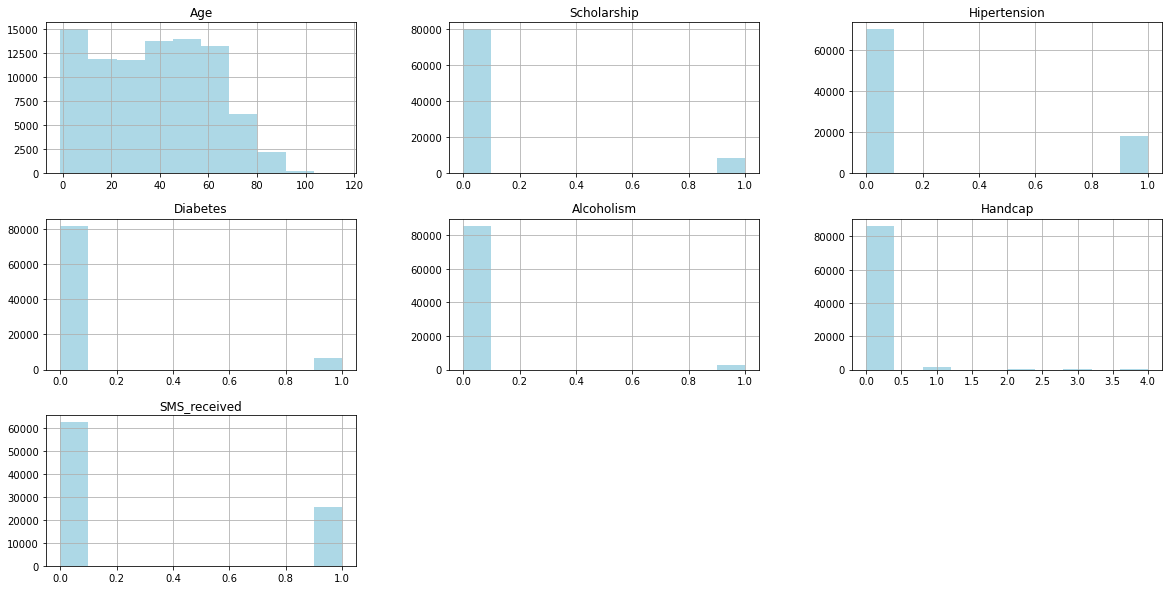

In [47]:
df[yes_show].hist(figsize=(20,10), color='lightblue');
plt.show();

Apart from age, the majority of above charted features are in "one-hot-encoding". Meaning they can either be present or not for each appointment and individual.
Therefore:

* Age seems to be irrelevant: there are both less shows and no-shows the higher the age, but that just means there are overall less people over 80 years in the sample

* The other variables all seem to have the same distribution both in the show and no-show appointments

In [57]:
df[yes_show].describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,1.476845e+14,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,2.563747e+14,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176184e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433715e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [58]:
df[no_show].describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


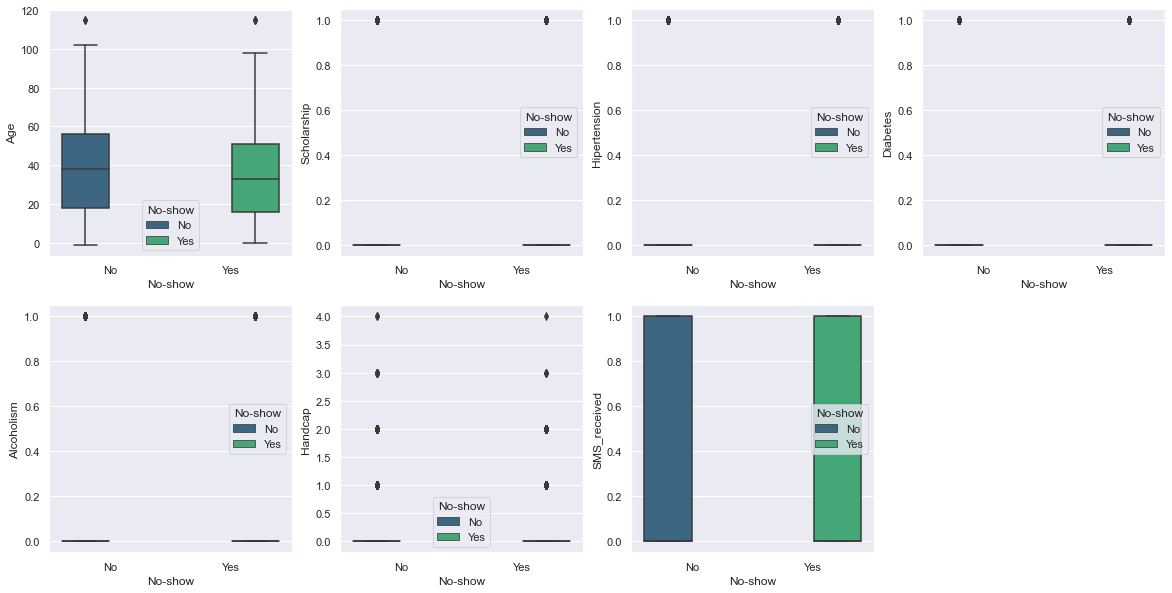

In [92]:
sns.set()
plt.figure(figsize=(20,10))
l = ['Age',	'Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism',	'Handcap',	'SMS_received']
for i in l:
    n = l.index(i)+1
    plt.subplot(2,4,n)
    sns.boxplot(x='No-show',y=i,hue='No-show',data=df,palette='viridis')
    
    # plt.boxplot(df[yes_show][i], color ='lightblue')

From the initial exploratory analysis above it seems like there is no clear relationship between not showing up and any of the above variables. Apparently, they all follow the same distribution regardless of whether the patient showed up or not.

---
## Delving deeper